# Figure 3
Data is assumed to be in the folder "../../data/sequencing_runs/" if that is not true change below

## setup

In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

from qmap_paper.plotting import publication_line, publication_style_ax

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
plt.rcParams["figure.facecolor"] = "white"

In [2]:
DATA_PATH = "../../data/sequencing_runs/"

In [3]:
df_wt_mg = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df_wt_buff = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")
df_mttr6_muts = pd.read_json(f"{DATA_PATH}/processed/mttr6_muts_titra.json")
df_mttr6_full = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")

### plotting functions

## data info

In [4]:
df_wt_mg["df_type"] = "df_wt_mg"
df_wt_buff["df_type"] = "df_wt_buff"
df_mttr6_muts["df_type"] = "df_mttr6_muts"
df_all = pd.concat([df_wt_mg, df_wt_buff, df_mttr6_muts])
# print all unique combos between run_name and exp_name
df_all.groupby(['df_type', 'run_name', 'exp_name', 'name']).count()

sequence  \
df_type       run_name                                 exp_name                                       name                                      
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                 16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed          16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed        16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed               16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed              16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed        16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed        16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                     8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07_25_C0117_NaC_Hep_titra_CM_BL           minittr-6-2HP-ref                    12   
                                                       2022_07_26_C0117_KCl_Tris_titra_CM_BL          minittr-6-2HP-ref                    12   
df_wt_mg      2022_07_27_minittr_50mM_NaC_Mg_titra_seq 2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM        minittr-6-2HP-ref                    15   
              2022_07_28_minittr_0.1M_NaC_Mg_titra_seq 2022_07_28_C0117_100mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_07_29_minittr_0.15M_NaC_Mg_titr_seq 2022_07_29_C0117_150mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_09_minittr_0.2M_NaC_Mg_titra_seq 2022_08_08_C0117_200mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_10_minittr_0.25M_NaC_Mg_titr_seq 2022_08_09_C0117_250mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_11_minittr_0.3M_NaC_Mg_titra_seq 2022_08_10_C0117_300mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   

                                                                                                                                     structure  \
df_type       run_name                                 exp_name                                       name                                       
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                  16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed           16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed         16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed                16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed               16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed         16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed         16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                      8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07

## plots

In [5]:
df_wt = df_wt_mg[df_wt_mg["run_name"] == "2022_07_27_minittr_50mM_NaC_Mg_titra_seq"]
df_uucg = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_uucg_fixed"]
df_notlr = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_no_tlr_fixed"]

In [6]:
data = [
    ["df_wt", len(df_wt), "WT"],
    ["df_uucg", len(df_uucg), "UUCG"],
    ["df_notlr", len(df_notlr), "No TLR"],
]
print(data)

[['df_wt', 15, 'WT'], ['df_uucg', 16, 'UUCG'], ['df_notlr', 16, 'No TLR']]


### Figure 3C

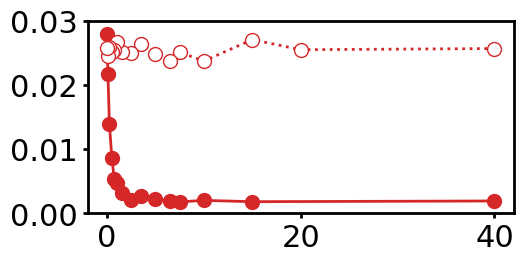

In [7]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['gaaa_avg'], marker='o', color='tab:red')
publication_line(ax, df_notlr['mg_conc'], df_notlr['gaaa_avg'], marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:red')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02,0.03]);


### Figure 3D

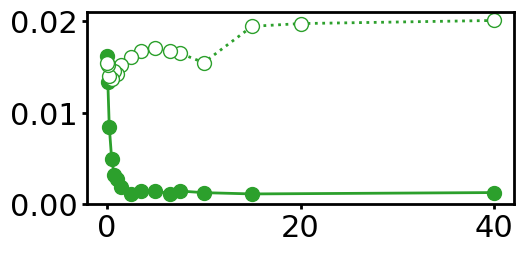

In [11]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 4
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:green')
publication_line(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:green')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02]);

### Figure 3E

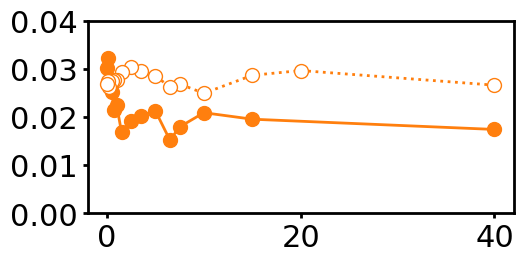

In [9]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 5
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:orange')
publication_line(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:orange')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02, 0.03, 0.04]);

### Figure 3F

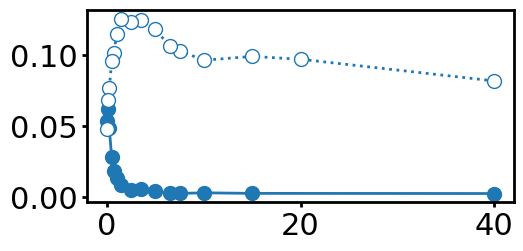

In [10]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 8
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:blue')
publication_line(ax, df_notlr['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:blue')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
#ax.set_yticks([0.0, 0.02,]);